In [3]:
pip install citipy

  Using cached citipy-0.0.5.tar.gz (557 kB)
  Using cached kdtree-0.16-py2.py3-none-any.whl (7.7 kB)
  Created wheel for citipy: filename=citipy-0.0.5-py3-none-any.whl size=559701 sha256=abd1c8d3df076373a872cbeb0f16d78906d138aab14bbd364fc19f7ff65dc736
  Stored in directory: c:\users\owner\appdata\local\pip\cache\wheels\72\ae\63\5d03cf6dfe5c0e9328fb73f8b30da1948a06b9cceaf2c68d2d
Successfully built citipy
Note: you may need to restart the kernel to use updated packages.


In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
from scipy.stats import linregress
from scipy import stats


# Import API key
from api_keys import weather_api_key 

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [6]:
#https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={API key}

In [7]:
# List for holding cities
cities = []
                   
  # Create a set of random latitude and longitude combinations.
#lats = np.random.uniform(low=-90.000, high=90.000, size=2000)
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
#lngs = np.random.uniform(low=-180.000, high=180.000, size=2000)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
# Add the latitudes and longitudes to a list.
#              

# Identify nearest city for each lat, lng combination
for coordinate in lat_lngs:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

611

In [61]:
#set up lists to hold reponse info
lat = []
lng = []
temp = []
humidity = []
cloudiness = []
wind_speed = []


#saving the config information
url = 'https://api.openweathermap.org/data/2.5/weather?'
#city = cities
city_data =[] 
for city in cities:
    query_url = (f'{url}appid={weather_api_key}&q={city}&units=imperial')
    weather_response = requests.get(query_url)
    city_weather = weather_response.json()
    #print(json.dumps(weather_json, indent=4, sort_keys=True))
     
    
    try:

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        country = city_weather['sys']['country']
        datetime = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          'Country Name': country,
                          'Date': datetime
                          })

        # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
    

City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skip

In [62]:
# Convert array of JSONs into Pandas DataFrame
city_data_pd = pd.DataFrame(city_data)


# Export the City_Data into a csv
city_data_pd.to_csv(output_data_file, index_label="City_ID")

city_data_pd.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country Name,Date
0,sitka,57.0531,-135.3300,57.09,97,100,6.71,US,1660532104
1,pipri,19.8000,75.5333,73.98,88,75,6.91,IN,1660532104
2,cayenne,4.9333,-52.3333,81.09,1,100,1.14,GF,1660532105
3,esperance,-33.8667,121.9000,61.57,57,0,14.00,AU,1660532106
4,hobart,-42.8794,147.3294,53.22,95,75,12.66,AU,1660531832


## Latitude vs. Temperature Plot

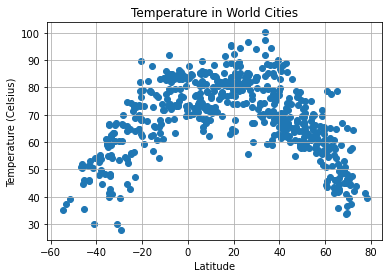

In [63]:
plt.scatter(city_data_pd["Lat"], city_data_pd["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title("Temperature in World Cities")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TemperatureInWorldCities.png")

# Show plot

As expected, the weather becomes significantly warmer as one approaches the equater. More intrestingly, is the fact that the southern hemisphere tend to be warmer this time of the year than the northern hemisphere. This may be due to the tilt of the earth at the time of the year this date was gathered.

## Latitude vs. Humidity Plot

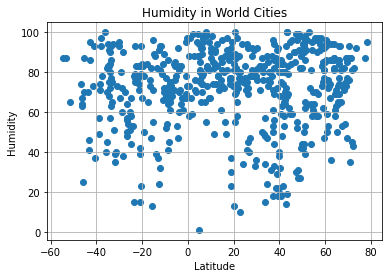

In [64]:
plt.scatter(city_data_pd["Lat"], city_data_pd['Humidity'], marker="o")

# Incorporate the other graph properties
plt.title("Humidity in World Cities")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("HumidityInWorldCities.png")

As we can see here, cities that are closer to the equater have a higher precentage of humidity. In addition, there are more cities with a lower precentage of humidity in the southern hemisphere than the northern hemisphere. This may be correlated to the fact that during this time, the northern hemisphere is in winter perhaps.

## Latitude vs. Cloudiness Plot

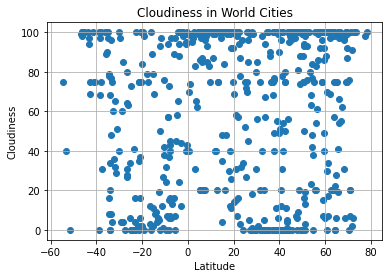

In [65]:
plt.scatter(city_data_pd["Lat"], city_data_pd["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("Cloudiness in World Cities")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CloudinessInWorldCities.png")

As we can see here, latitude dosn't have a significant effect on cloudiness in the area. For example, latitudes values ranging from -60 to 80 all have weather in certain areas that are 0% cloudy. However, this may be due to that fact that this date wasn't during a typical hurricane or typhon season perhaps.

## Latitude vs. Wind Speed Plot

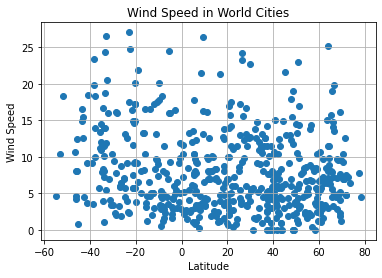

In [66]:
plt.scatter(city_data_pd["Lat"], city_data_pd["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("Wind Speed in World Cities")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("WindSpeedInWorldCities.png")

It is clear to see that wind speeds in the northern hemisphereare are slightly higher than those in the southern hemisphere. For example, max wind speeds in the southern hemisphere are up to 25 mph, while the max wind speeds in the northern hemisphere are above 35 mph! This data suggest that maybe this was collected during the earlier months in the year.

## Linear Regression

### Northern Hemisphere - Temperature (F) vs. Latitude

In [67]:
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(city_data_pd.loc[city_data_pd['Lat']>= 0, 'Lat'], city_data_pd.loc[city_data_pd['Lat']>= 0, 'Max Temp'])

# Get regression values
regress_values = city_data_pd.loc[city_data_pd['Lat']>= 0, 'Lat'] * slope + intercept
print(regress_values)


0      60.684811
1      78.017417
2      84.934390
7      71.113286
8      84.197687
         ...    
547    81.620252
548    68.851674
549    64.485989
552    82.879449
554    69.561298
Name: Lat, Length: 383, dtype: float64


In [68]:
# city_data_pd.loc[city_data_pd['Lat']>= 0, 'Lat']

In [69]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = -0.47x +87.23


The r-value is: 0.5182244578259092


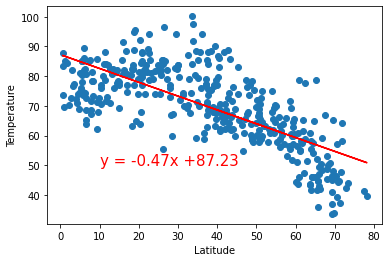

In [70]:
# Create Plot
plt.scatter(city_data_pd.loc[city_data_pd['Lat']>= 0, 'Lat'], city_data_pd.loc[city_data_pd['Lat']>= 0, 'Max Temp'])
plt.plot(city_data_pd.loc[city_data_pd['Lat']>= 0, 'Lat'],regress_values,"r-")


# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.annotate(line_eq,(10,50),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

### Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [71]:
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(city_data_pd.loc[city_data_pd['Lat']<= 0, 'Lat'], city_data_pd.loc[city_data_pd['Lat']<= 0, 'Max Temp'])

# Get regression values
regress_values = city_data_pd.loc[city_data_pd['Lat']<= 0, 'Lat'] * slope + intercept
print(regress_values)


3      55.526611
4      48.099902
5      39.636649
6      59.729149
9      64.381936
         ...    
535    70.718045
542    78.658453
550    68.999454
551    61.706814
553    79.910067
Name: Lat, Length: 172, dtype: float64


In [72]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 0.82x +83.43


The r-value is: 0.6240295563226095


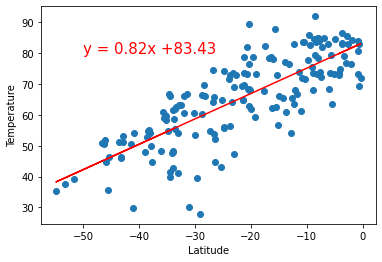

In [73]:
# Create Plot
plt.scatter(city_data_pd.loc[city_data_pd['Lat']<= 0, 'Lat'], city_data_pd.loc[city_data_pd['Lat']<= 0, 'Max Temp'])
plt.plot(city_data_pd.loc[city_data_pd['Lat']<= 0, 'Lat'],regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.annotate(line_eq,(-50,80),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

These 2 linear regression plots are modeling how temperature differs between the northern and southern hemisphers. 

### Northern Hemisphere - Humidity (%) vs. Latitude

In [74]:
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(city_data_pd.loc[city_data_pd['Lat']>= 0, 'Lat'], city_data_pd.loc[city_data_pd['Lat']>= 0, 'Humidity'])

# Get regression values
regress_values = city_data_pd.loc[city_data_pd['Lat']>= 0, 'Lat'] * slope + intercept
print(regress_values)

0      71.697429
1      74.122489
2      75.090265
7      73.156510
8      74.987191
         ...    
547    74.626574
548    72.840081
549    72.229264
552    74.802752
554    72.939367
Name: Lat, Length: 383, dtype: float64


In [75]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = -0.07x +75.41


The r-value is: 0.004252888111686895


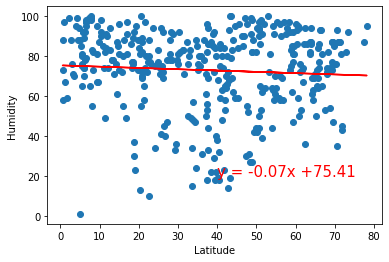

In [76]:
# Create Plot
plt.scatter(city_data_pd.loc[city_data_pd['Lat']>= 0, 'Lat'], city_data_pd.loc[city_data_pd['Lat']>= 0, 'Humidity'])
plt.plot(city_data_pd.loc[city_data_pd['Lat']>= 0, 'Lat'],regress_values,"r-")


# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(40,20),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

### Southern Hemisphere - Humidity (%) vs. Latitude

In [77]:
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(city_data_pd.loc[city_data_pd['Lat']<= 0, 'Lat'], city_data_pd.loc[city_data_pd['Lat']<= 0, 'Humidity'])

# Get regression values
regress_values = city_data_pd.loc[city_data_pd['Lat']<= 0, 'Lat'] * slope + intercept
print(regress_values)

3      69.089517
4      68.967913
5      68.829338
6      69.158328
9      69.234512
         ...    
535    69.338258
542    69.468272
550    69.310118
551    69.190710
553    69.488766
Name: Lat, Length: 172, dtype: float64


In [78]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 0.01x +69.55


The r-value is: 9.762165129334039e-05


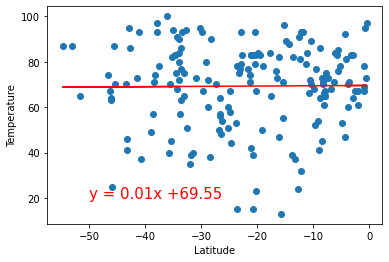

In [79]:
# Create Plot
plt.scatter(city_data_pd.loc[city_data_pd['Lat']<= 0, 'Lat'], city_data_pd.loc[city_data_pd['Lat']<= 0, 'Humidity'])
plt.plot(city_data_pd.loc[city_data_pd['Lat']<= 0, 'Lat'],regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

### Northern Hemisphere - Cloudiness (%) vs. Latitude

In [80]:
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(city_data_pd.loc[city_data_pd['Lat']>= 0, 'Lat'], city_data_pd.loc[city_data_pd['Lat']>= 0, 'Cloudiness'])

# Get regression values
regress_values = city_data_pd.loc[city_data_pd['Lat']>= 0, 'Lat'] * slope + intercept
print(regress_values)

0      57.914344
1      66.462497
2      69.873832
7      63.057494
8      69.510503
         ...    
547    68.239355
548    61.942105
549    59.789022
552    68.860369
554    62.292080
Name: Lat, Length: 383, dtype: float64


In [81]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = -0.23x +71.01


The r-value is: 0.014690206526366692


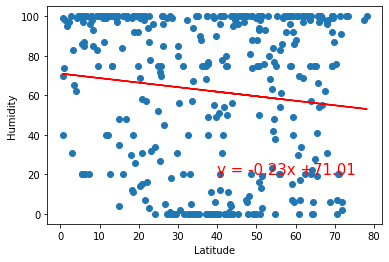

In [82]:
# Create Plot
plt.scatter(city_data_pd.loc[city_data_pd['Lat']>= 0, 'Lat'], city_data_pd.loc[city_data_pd['Lat']>= 0, 'Cloudiness'])
plt.plot(city_data_pd.loc[city_data_pd['Lat']>= 0, 'Lat'],regress_values,"r-")


# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(40,20),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

### Southern Hemisphere - Cloudiness (%) vs. Latitude

In [83]:
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(city_data_pd.loc[city_data_pd['Lat']<= 0, 'Lat'], city_data_pd.loc[city_data_pd['Lat']<= 0, 'Cloudiness'])

# Get regression values
regress_values = city_data_pd.loc[city_data_pd['Lat']<= 0, 'Lat'] * slope + intercept
print(regress_values)

3      56.982913
4      61.265247
5      66.145266
6      54.559676
9      51.876821
         ...    
535    48.223340
542    43.644801
550    49.214301
551    53.419330
553    42.923104
Name: Lat, Length: 172, dtype: float64


In [84]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = -0.48x +40.89


The r-value is: 0.028411522634770325


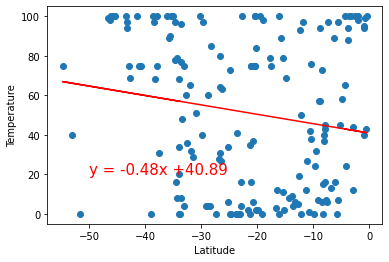

In [85]:
# Create Plot
plt.scatter(city_data_pd.loc[city_data_pd['Lat']<= 0, 'Lat'], city_data_pd.loc[city_data_pd['Lat']<= 0, 'Cloudiness'])
plt.plot(city_data_pd.loc[city_data_pd['Lat']<= 0, 'Lat'],regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

### Northern Hemisphere - Wind Speed (mph) vs. Latitude

In [86]:
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(city_data_pd.loc[city_data_pd['Lat']>= 0, 'Lat'], city_data_pd.loc[city_data_pd['Lat']>= 0, 'Wind Speed'])

# Get regression values
regress_values = city_data_pd.loc[city_data_pd['Lat']>= 0, 'Lat'] * slope + intercept
print(regress_values)

0      7.128579
1      7.225476
2      7.264145
7      7.186879
8      7.260027
         ...   
547    7.245618
548    7.174236
549    7.149830
552    7.252657
554    7.178203
Name: Lat, Length: 383, dtype: float64


In [87]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = -0.0x +7.28


The r-value is: 0.00011452222326917459


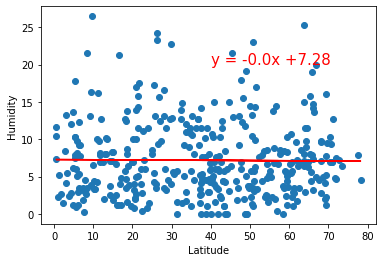

In [88]:
# Create Plot
plt.scatter(city_data_pd.loc[city_data_pd['Lat']>= 0, 'Lat'], city_data_pd.loc[city_data_pd['Lat']>= 0, 'Wind Speed'])
plt.plot(city_data_pd.loc[city_data_pd['Lat']>= 0, 'Lat'],regress_values,"r-")


# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(40,20),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

### Southern Hemisphere - Wind Speed (mph) vs. Latitude

In [89]:
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(city_data_pd.loc[city_data_pd['Lat']<= 0, 'Lat'], city_data_pd.loc[city_data_pd['Lat']<= 0, 'Wind Speed'])

# Get regression values
regress_values = city_data_pd.loc[city_data_pd['Lat']<= 0, 'Lat'] * slope + intercept
print(regress_values)

3      10.541927
4      11.442356
5      12.468459
6      10.032403
9       9.468289
         ...    
535     8.700086
542     7.737375
550     8.908452
551     9.792626
553     7.585626
Name: Lat, Length: 172, dtype: float64


In [90]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = -0.1x +7.16


The r-value is: 0.049277664190342074


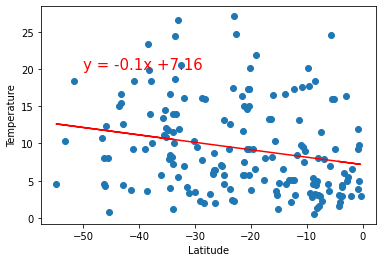

In [91]:
# Create Plot
plt.scatter(city_data_pd.loc[city_data_pd['Lat']<= 0, 'Lat'], city_data_pd.loc[city_data_pd['Lat']<= 0, 'Wind Speed'])
plt.plot(city_data_pd.loc[city_data_pd['Lat']<= 0, 'Lat'],regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()